### load dependencies and files

In [1]:
#add Matplotlib inline magic command
%matplotlib inline
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"


In [3]:
#read the city data file and store it in a pandas
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
#read the ride data file and store it in pandas
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178
4,South Jack,3/6/2019 4:28,34.58,3908451377344
5,South Latoya,3/11/2019 12:26,9.52,1994999424437
6,New Paulville,2/27/2019 11:17,43.25,793208410091
7,Simpsonburgh,4/26/2019 0:43,35.98,111953927754
8,South Karenland,1/8/2019 3:28,35.09,7995623208694
9,North Jasmine,3/9/2019 6:26,42.81,5327642267789


### Inspect the City Data DataFrame
For the city_data_df DataFrame, we need to:

- Get all the rows that contain null values.

- Make sure the driver_count column has an integer data type.

- Find out how many data points there are for each type of city.

In [5]:
#get the columns and rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
#get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# get the data type for each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#get teh number of data points from teh Urban cities
sum(city_data_df["type"]=="Urban")
sum(city_data_df["type"]=="Rural")

18

In [10]:
#get teh number of data points from teh Suburban cities
sum(city_data_df["type"]=="Suburban")


36

In [11]:
#get teh number of data points from teh Rural cities
sum(city_data_df["type"]=="Rural")

18

### Inspect Ride Data DataFrame
For the ride_data_df DataFrame, we need to:

- Get all the rows that contain null values.

- Make sure the fare and ride_id columns are numerical data types.

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
#Get teh columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

### Merge the DataFrames

In [15]:
#Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
#display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


### Create a bubble chart
- The average fare for each type of city on the y-axis

- The total number of rides for each type city on the x-axis

- Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city

Here are the steps to create a bubble chart:

- To get the average fare, we can use the Pandas mean() method for each city in the "fare" column.
- To get the total number of rides for each city, we can use the Pandas count() method for each city in the "ride_id" column.
- To make the bubble size correlate to the number of drivers for each city, we can get the average driver_count for each city.




#### Completing the steps will be more efficient if we create separate DataFrames for each type and then create Data Series for each step.

Let's create three separate DataFrames, one for each type of city.

Each new DataFrame can be created by filtering the pyber_data_df DataFrame where the city type is equal to Urban, Suburban, or Rural.

Add the following code in a new cell to create the Urban cities DataFrame:

In [16]:
#Create the Urban city DataFrame.
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


In [17]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]

In [18]:
#get first city in rural_cities_df
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1076079536213,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1985256326182,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4018025271936,2,Rural


#### To get the number of rides for each city by each type of city, we have to create a Series where the index is the name of the city and the column is the number of rides for that city.

In [19]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [20]:
# Create the suburban and rural ride count.

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

##### We now have one of the three datasets we need to create a bubble chart. Next, we'll use the groupby() function on the city type DataFrames to get the average fare for each city type. This will be our second dataset.

Using the separate DataFrames for each city type, we can calculate the average fare for each city in the urban, suburban, and rural cities.

Using the groupby() function, we can chain the mean() method to get the averages of the fare column.

Add the following code to a new cell and run the cell.

In [21]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [22]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

##### Now we have two of three datasets we need to create a bubble chart. Next, we'll use the groupby() function on the city type DataFrames to get the average number of drivers for each city type. This will be our third and final dataset.

#### The last data point we need for our bubble chart is the average number of drivers for each city in the urban, suburban, and rural cities.

To get the average number of drivers for each city in the urban, suburban, and rural cities, we can use the groupby() function and get the mean() of the driver_count column.


In [23]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count.head()


city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [24]:
# Get the average number of drivers for each city for the suburban and rural cities.

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


##### create a scatter plot for each type of city where the following conditions are met:

- The x-axis is the number of rides for each city.

- The y-axis is the average fare for each city. 

- The size of each marker is the average number of drivers in each city. 

- Let's create each scatter plot individually and add them all to one chart.

The first scatter plot is for urban cities using the MATLAB method.

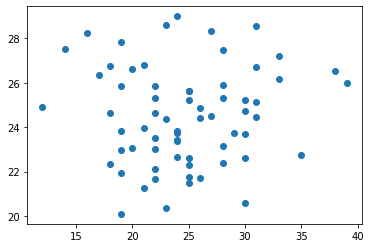

In [25]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare)

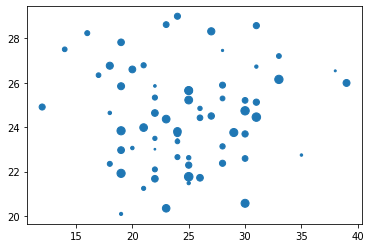

In [26]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare, s=urban_driver_count)

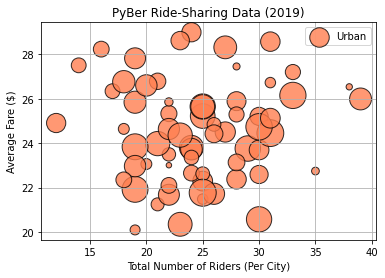

In [27]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor= "black", linewidths=1,
           alpha=0.8, label= "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Riders (Per City)")
plt.grid(True)

#add legend
plt.legend()

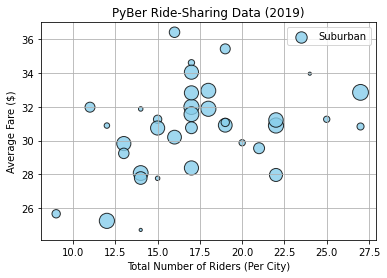

In [28]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor= "black", linewidths=1,
           alpha=0.8, label= "Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Riders (Per City)")
plt.grid(True)

#add legend
plt.legend()

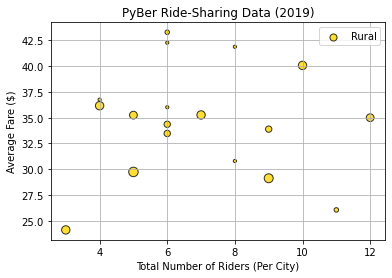

In [29]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count, rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor= "black", linewidths=1,
           alpha=0.8, label= "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Riders (Per City)")
plt.grid(True)

#add legend
plt.legend()

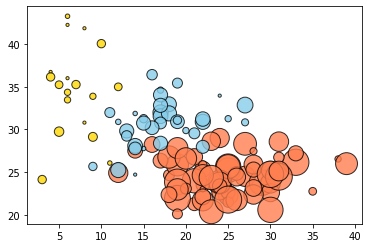

In [30]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count, urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor= "black", linewidths=1,
           alpha=0.8, label= "Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor= "black", linewidths=1,
           alpha=0.8, label= "Suburban")

plt.scatter(rural_ride_count, rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor= "black", linewidths=1,
           alpha=0.8, label= "Rural")

#show the plot
plt.show()



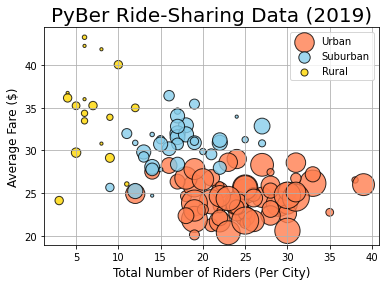

In [31]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count, urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor= "black", linewidths=1,
           alpha=0.8, label= "Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor= "black", linewidths=1,
           alpha=0.8, label= "Suburban")

plt.scatter(rural_ride_count, rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor= "black", linewidths=1,
           alpha=0.8, label= "Rural")




#incorporate th other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize= 12)
plt.xlabel("Total Number of Riders (Per City)", fontsize = 12)
plt.grid(True)

#add legend
plt.legend()

#Show the plot
plt.show()

##### need to fix the legend above


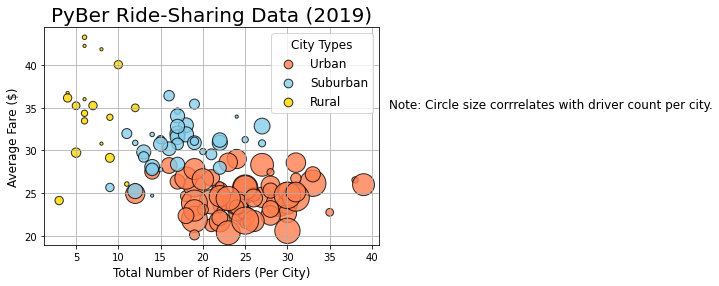

In [32]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count, urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor= "black", linewidths=1,
           alpha=0.8, label= "Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor= "black", linewidths=1,
           alpha=0.8, label= "Suburban")

plt.scatter(rural_ride_count, rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor= "black", linewidths=1,
           alpha=0.8, label= "Rural")




#incorporate th other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize= 12)
plt.xlabel("Total Number of Riders (Per City)", fontsize = 12)
plt.grid(True)

#add legend
plt.legend()

#Create a legend
lgnd=plt.legend(fontsize="12", mode="Expanded", 
               scatterpoints = 1, loc="best", title = "City Types")

lgnd.legendHandles[0]._sizes =[75]
lgnd.legendHandles[1]._sizes =[75]
lgnd.legendHandles[2]._sizes =[75]

lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42,35, "Note: Circle size corrrelates with driver count per city.", fontsize = "12")


# Save the figure.
plt.savefig("analysis/Fig1.png")

#Show the plot
plt.show()




##### the note message above does not show up in the png file.  Just the word note.

### Statistics
use and compare the following three ways to calculate the summary statistics:

- The Pandas describe() function on the DataFrame or Series.
- The Pandas mean(), median(), and mode() methods on a Series.
- The NumPy mean() and median() functions, and the SciPy stats mode() function on a Series.

#### Describe method

In [33]:
# get summary statisitcis using the describe method

urban_cities_df.describe()


,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [34]:
#Skill drill: run describe function on suburban_cities_df & rural_cities_df
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [35]:
#Skill drill - run describe function on suburban_cities_df & rural_cities_df
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [36]:
#get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [37]:
#get summary statistics.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [38]:
#get summary statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

#### Pandas mean, median and mode methods

In [39]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [40]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [41]:
#calculate the mode of the ride count for the urban cities   - NOTE: this gives 2 modes
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [42]:
#calculate the mode of the ride count for the suburban cities   - NOTE: this gives 2 modes
suburban_ride_count.mode()

0    17
dtype: int64

#### Numpy mean(), median() Functions and SciPy mode() Function
- for use in the Python interpreter, VS Code, or Jupyter Notebook environment, 

- need to import the NumPy and SciPy statistics modules. 

In [43]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [44]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count= np.mean(urban_ride_count)
print(f"The mean for the ride counts for the urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count= np.median(urban_ride_count)
print(f"The median for the ride counts for the urban trips is {median_urban_ride_count}.")

mode_urban_ride_count= sts.mode(urban_ride_count)
print(f"The mode for the ride counts for the urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for the urban trips is 24.62.
The median for the ride counts for the urban trips is 24.0.
The mode for the ride counts for the urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [45]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count= np.mean(suburban_ride_count)
print(f"The mean for the ride counts for the suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count= np.median(suburban_ride_count)
print(f"The median for the ride counts for the suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count= sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for the suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for the suburban trips is 17.36.
The median for the ride counts for the suburban trips is 17.0.
The mode for the ride counts for the suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [46]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count= np.mean(rural_ride_count)
print(f"The mean for the ride counts for the rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count= np.median(rural_ride_count)
print(f"The median for the ride counts for the rural trips is {median_rural_ride_count}.")

mode_rural_ride_count= sts.mode(rural_ride_count)
print(f"The mode for the ride counts for the rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for the rural trips is 6.94.
The median for the ride counts for the rural trips is 6.0.
The mode for the ride counts for the rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


#### Summary Statistics for the Fare by City Type

to get the summary statistics for the average fare for each city type, pull data from the "fare" column in each city type DataFrame.


In [47]:
# Get the fares for the urban cities.
urban_fares=urban_cities_df["fare"]
urban_fares.head()


0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [48]:
 # Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares= np.mean(urban_fares)
print(f"The mean for the fare price for the urban trips is {mean_urban_fares:.2f}.")

median_urban_fares= np.median(urban_fares)
print(f"The median for the fare price for the urban trips is {median_urban_fares}.")

mode_urban_fares= sts.mode(urban_fares)
print(f"The mode for the fare price for the urban trips is {mode_urban_fares}.")   
    
    
    

The mean for the fare price for the urban trips is 24.53.
The median for the fare price for the urban trips is 24.64.
The mode for the fare price for the urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [49]:
# Get the fares for the suburban cities.
suburban_fares=suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [50]:
 # Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares= np.mean(suburban_fares)
print(f"The mean for the fare price for the suburban trips is {mean_suburban_fares:.2f}.")

median_suburban_fares= np.median(suburban_fares)
print(f"The median for the fare price for the suburban trips is {median_suburban_fares}.")

mode_suburban_fares= sts.mode(suburban_fares)
print(f"The mode for the fare price for the suburban trips is {mode_suburban_fares}.")   

The mean for the fare price for the suburban trips is 30.97.
The median for the fare price for the suburban trips is 30.75.
The mode for the fare price for the suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [51]:
# Get the fares for the rural cities.
rural_fares=rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [52]:
 # Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares= np.mean(rural_fares)
print(f"The mean for the fare price for the rural trips is {mean_rural_fares:.2f}.")

median_rural_fares= np.median(rural_fares)
print(f"The median for the fare price for the rural trips is {median_rural_fares}.")

mode_rural_fares= sts.mode(rural_fares)
print(f"The mode for the fare price for the rural trips is {mode_rural_fares}.")   

The mean for the fare price for the rural trips is 34.62.
The median for the fare price for the rural trips is 37.05.
The mode for the fare price for the rural trips is ModeResult(mode=array([37.05]), count=array([2])).


#### Summary Statistics for the Number of Drivers by City Type
To perform summary statistics for the number of drivers by city type, create a Series for each city type based on the driver_count column in each city type DataFrame.

In [53]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [54]:
# Calculate the measures of central tendency for the driver count for the urban cities.
mean_urban_drivers= np.mean(urban_drivers)
print(f"The mean for the driver count for the urban trips is {mean_urban_drivers:.2f}.")

median_urban_drivers= np.median(urban_drivers)
print(f"The median for the driver count for the urban trips is {median_urban_drivers}.")

mode_urban_drivers= sts.mode(urban_drivers)
print(f"The mode for the driver count for the urban trips is {mode_urban_drivers}.")  

The mean for the driver count for the urban trips is 36.68.
The median for the driver count for the urban trips is 37.0.
The mode for the driver count for the urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [55]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [56]:
# Calculate the measures of central tendency for the driver count for the suburban cities.
mean_suburban_drivers= np.mean(suburban_drivers)
print(f"The mean for the driver count for the suburban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers= np.median(suburban_drivers)
print(f"The median for the driver count for the suburban trips is {median_suburban_drivers}.")

mode_suburban_drivers= sts.mode(suburban_drivers)
print(f"The mode for the driver count for the suburban trips is {mode_suburban_drivers}.")  

The mean for the driver count for the suburban trips is 13.71.
The median for the driver count for the suburban trips is 16.0.
The mode for the driver count for the suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [57]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [58]:
# Calculate the measures of central tendency for the driver count for the rural cities.
mean_rural_drivers= np.mean(rural_drivers)
print(f"The mean for the driver count for the rural trips is {mean_rural_drivers:.2f}.")

median_rural_drivers= np.median(rural_drivers)
print(f"The median for the driver count for the rural trips is {median_rural_drivers}.")

mode_rural_drivers= sts.mode(rural_drivers)
print(f"The mode for the driver count for the rural trips is {mode_rural_drivers}.")  

The mean for the driver count for the rural trips is 4.30.
The median for the driver count for the rural trips is 4.0.
The mode for the driver count for the rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


#### Create Box-and-Whisker Plots
Create a box-and-whisker plot - use the ax.boxplot() function, which takes an array inside the parentheses

##### Box and Whisker plot for ride count

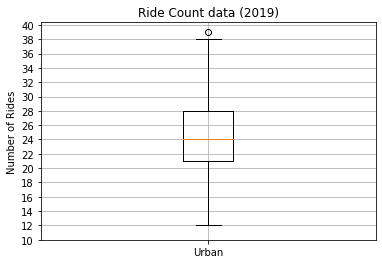

In [59]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels=["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

#add title, y-axis label and grid.
ax.set_title('Ride Count data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

In [60]:
#summary statistics on urban ride count for comparison with chart above
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

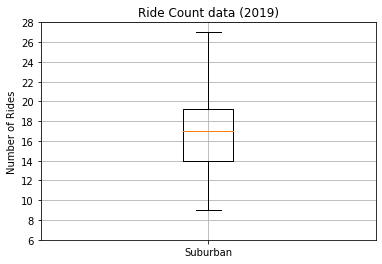

In [61]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels=["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

#add title, y-axis label and grid.
ax.set_title('Ride Count data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(6,30, step=2.0))
ax.grid()
plt.show()

In [62]:
#summary statistics on suburban ride count for comparison with chart above
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

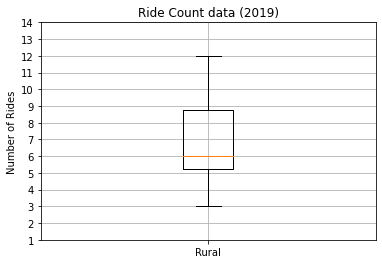

In [63]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels=["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

#add title, y-axis label and grid.
ax.set_title('Ride Count data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(1,15, step=1.0))
ax.grid()
plt.show()

In [64]:
#summary statistics on rural ride count for comparison with chart above
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

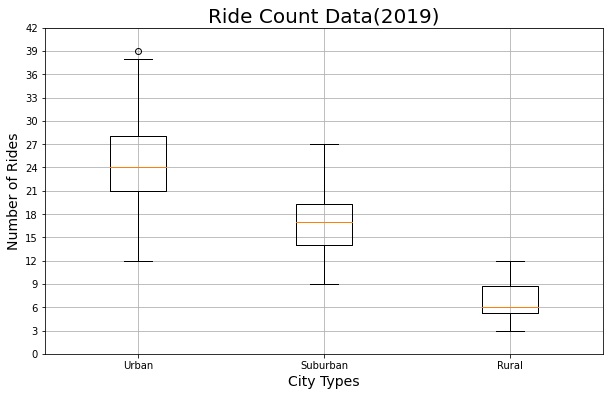

In [65]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels=["Urban", "Suburban", "Rural"]
ride_count_data=[urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax=plt.subplots(figsize=(10,6))
ax.set_title("Ride Count Data(2019)", fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()
# save the figure.
plt.savefig("analysis/Fig2.png")
plt.show



In [66]:
#get the city that has the highest ride count - that is the city that matches 39 (the highest ride count)
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")


West Angela has the highest rider count.


##### Box and whisker plot for Fare data

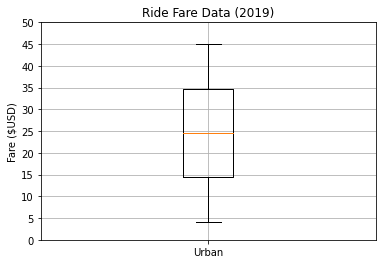

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [67]:
# Create a box-and-whisker plot for the urban fare data.
x_labels=["Urban"]
fig, ax= plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

#add the title, y_axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

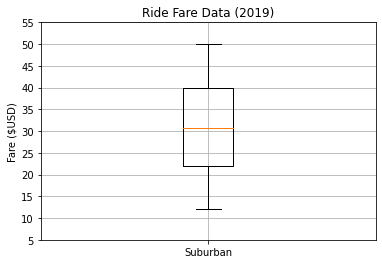

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [68]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels=["Suburban"]
fig, ax= plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

#add the title, y_axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(5,60, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_fares.describe()

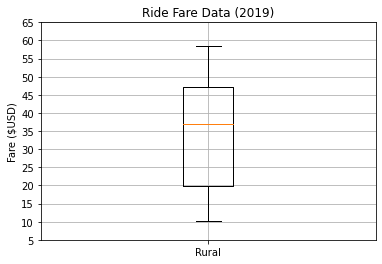

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [69]:
# Create a box-and-whisker plot for the rural fare data.
x_labels=["Rural"]
fig, ax= plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

#add the title, y_axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(5,70, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_fares.describe()

<function matplotlib.pyplot.show(close=None, block=None)>

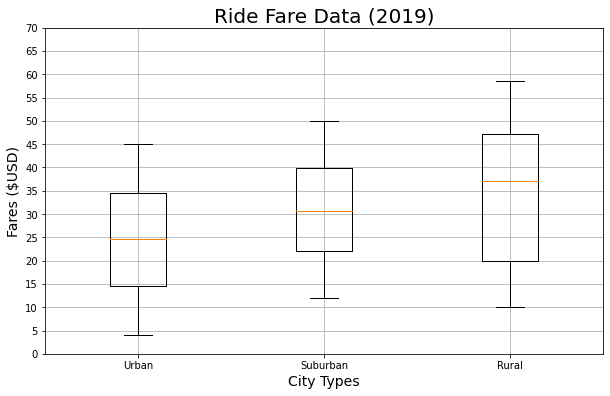

In [70]:
# Add all fare box-and-whisker plots to the same graph.
x_labels=["Urban", "Suburban", "Rural"]
ride_count_data=[urban_fares, suburban_fares, rural_fares]
fig, ax=plt.subplots(figsize=(10,6))
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel('Fares ($USD)', fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,75, step=5.0))
ax.grid()
# save the figure.
plt.savefig("analysis/Fig3.png")
plt.show



##### Box and Whisker plot for Driver Count

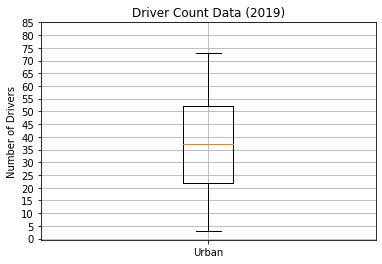

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [71]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

#Add the title, y-axis label andgrid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()




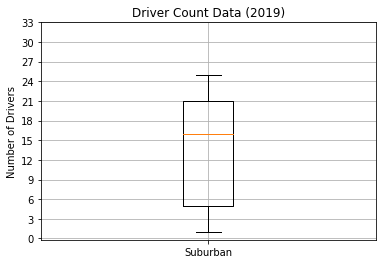

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [72]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

#Add the title, y-axis label andgrid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 35, step=3.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_drivers.describe()

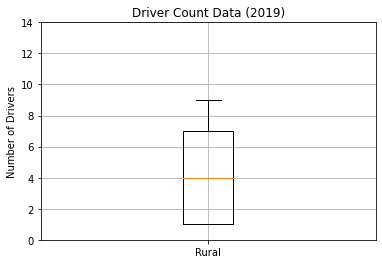

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [73]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

#Add the title, y-axis label andgrid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 15, step=2.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_drivers.describe()

<function matplotlib.pyplot.show(close=None, block=None)>

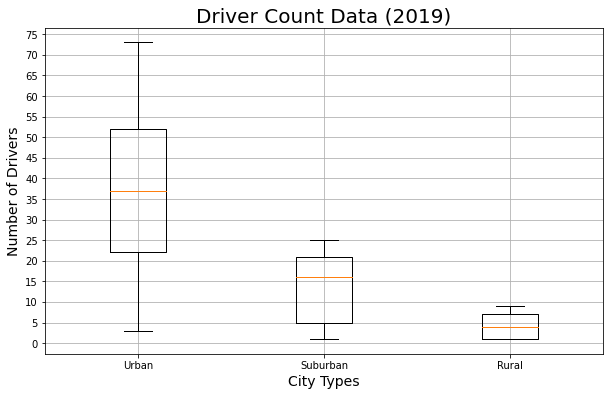

In [74]:
# Add all fare box-and-whisker plots to the same graph.
x_labels=["Urban", "Suburban", "Rural"]
ride_count_data=[urban_drivers, suburban_drivers, rural_drivers]
fig, ax=plt.subplots(figsize=(10,6))
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,80, step=5.0))
ax.grid()
# save the figure.
plt.savefig("analysis/Fig4.png")
plt.show



#### Pie Charts

#####  show the percentage of the overall fares for each type of city, where each pie wedge will represent the percentage of total fares for each city type.
To create this pie chart, we will need to do the following:

- Get the total fares for each city type.

- Get the total for all the fares for all the city types.

- Calculate the percentage of the total fares for each city type.

To get the total fares for city type, create a Series where the index is the type of city on the pyber_data_df DataFrame and the column is the sum of the fares for city type.

To calculate the percentage of the total fares for each city type based on the total fares:

- Use the groupby() function on the pyber_data_df DataFrame and group by the type of city column so the type of city is the index.

- Apply the sum() method on the fare column to get the Series with the total number of fares for each city type.

- Divide the total fares for each city type by the total of all the fares and multiply by 100.

Create a Series using the groupby() function on the pyber_data_df DataFrame that has the type of city as an index. Then apply the sum() method to the Series for each type of city and select the fare column.

In [75]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [76]:
# Get the sum of all the fares.
total_fares = pyber_data_df['fare'].sum()
total_fares

63538.64

In [77]:
# Calculate the percentage of fare for each city type.
type_percents = 100* sum_fares_by_type/ total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [78]:
# Calculate the percentage of fare for each city type - in one line
type_percents = 100* pyber_data_df.groupby(['type']).sum()["fare"]/pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

##### Pie Chart for the Percentage of Fares by City Type
Create a pie chart by using the MATLAB approach, using the plt.pie() function.

- To create a pie chart with the plt.pie() function, we need an array that contains the values and labels we are plotting.

For the pie chart, each pie wedge will represent a city and its percentage of the total fares. The labels will be the city type.

We can use type_percents for the values for each pie wedge and create an array for the labels.

<function matplotlib.pyplot.show(close=None, block=None)>

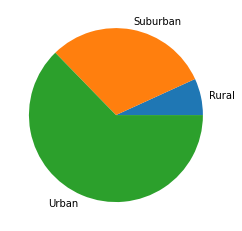

In [79]:
# Build the percentage of fares by city type pie chart.

plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show

######  Add a title, add the percentages, change the color to adhere to the company color scheme, add a shadow to the pie chart, and adjust the start angle.



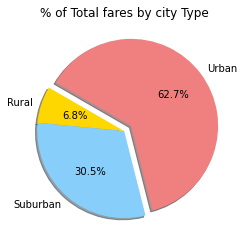

In [80]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
        colors=['gold', "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle = 150)
plt.title("% of Total fares by city Type")

#Show Figure
plt.show()



###### change the font size to 14, To change the default parameters, import the matplotlib library 


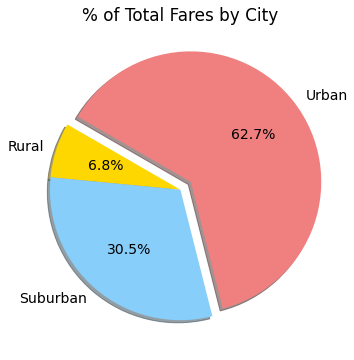

In [83]:
# Import mpl to change the plot configurations using rcParams.

import matplotlib as mpl

# Build pie Chart
plt.subplots(figsize=(10,6))
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
        colors=['gold', "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle = 150)
plt.title("% of Total Fares by City")
mpl.rcParams['font.size']=14

# Save figure
plt.savefig("analysis/Fig5.png")

#Show Figure
plt.show()



##### Calculate Ride Percentages and Pie Chart
Showcase the percentage of total rides for each type of city, where each pie wedge represents the percentage of total rides for each city type. 

To create this pie chart, do the following:

- Get the total number of rides for each city type.
- Get the total rides for all the city types.
- Calculate the percentage of the total rides for each city type.

To get the total rides for each type of city, create a Series of data where the index is the type of city, and the column for the Series is the number of the rides for the type of city. This is similar to how we created the Series for the percentage of fares for each city type.

To calculate the percentage of rides for each city type based on all the rides;

- Use the groupby() function on the pyber_data_df DataFrame and group by the type of city column:

- pyber_data_df.groupby(["type"])

Apply the count() function on the ride_id column to get the Series with the total number of rides for each city type:

- pyber_data_df.groupby(["type"]).count()["ride_id"]

Get the number of total rides using the count() function on the ride_id column on the pyber_data_df DataFrame:

- pyber_data_df["ride_id"].count()
Divide the total number of rides for each city type by the total rides for all the cities and divide by 100.


In [89]:
# Calculate the percentage of rides for each city type.

ride_percents =100*pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df["ride_id"].count()

ride_percents


type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

###### create a pie chart for the percentage of rides by city type, where each wedge represents a city and its percentage of the total rides.

Copy the code block that created the percentage of fares for each city pie chart, and do the following:

- Replace type_percents with ride_percents, which will represent the values for each pie wedge.
- use the same arrays for labels and colors as before.
- use the same parameters, explode, autopct, shadow=True, and startangle=150 as before.
- change the font size with mpl.rcParams['font.size'] = 14 as before. There is no need to import matplotlib as mpl, since this was already done for the previous pie chart.
- Change the title to "% of Total Rides by City Type."
- Save the figure as Fig6.png.

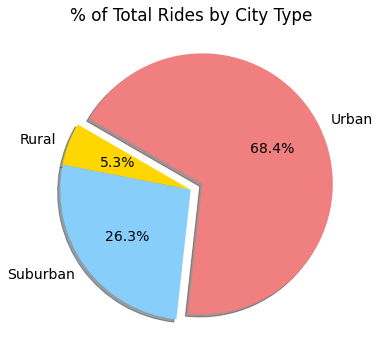

In [92]:
# Build pie Chart for % of rides by city
plt.subplots(figsize=(10,6))
plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"],
        colors=['gold', "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle = 150)
plt.title("% of Total Rides by City Type")
mpl.rcParams['font.size']=14

# Save figure
plt.savefig("analysis/Fig6.png")

#Show Figure
plt.show()